<a href="https://colab.research.google.com/github/highmoo/model-predicts-rocks-or-mines-for-a-marine-submarine/blob/main/TestandTryKAUST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline

In [88]:
# Read the house data into a data frame
df = pd.read_csv('/content/bikers_data.csv')

In [89]:
# Display the first five observations
df.head()

,Date,Number of bikers,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
0,2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1
1,2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1
2,2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1
3,2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1
4,2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,60.5,1


In [90]:
df.describe()

,Number of bikers,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
count,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000
mean,10972.597128,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.027967,11.907412,0.117305,54.285714,0.568405
std,5479.641291,0.349993,0.349993,0.349993,0.349993,0.349993,0.349993,0.349993,0.164909,2.615865,0.264038,10.875798,0.495392
min,152.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.218894,0.000000,25.000000,0.000000
25%,7105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.360658,0.000000,46.000000,0.000000
50%,10308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.812303,0.000000,53.500000,1.000000
75%,15274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.463207,0.110000,63.000000,1.000000
max,25712.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.781095,3.250000,82.000000,1.000000


In [91]:
# Drop the id and date columns
df = df.drop( ["Date"], axis=1)

In [92]:
# Display the number of data observations
len(df)

2646

In [93]:
# Display the number of starting features
len(df.columns)

13

In [94]:
# Check the types of data
df.dtypes

Number of bikers    float64
Mon                 float64
Tue                 float64
Wed                 float64
Thu                 float64
Fri                 float64
Sat                 float64
Sun                 float64
holiday             float64
daylight_hrs        float64
Rainfall (in)       float64
Temp (F)            float64
dry day               int64
dtype: object

In [95]:
# Display the number of null data observations
df.isnull().values.sum()


0

In [96]:
# Specify target and features
target = df.iloc[:, 0].name
features = df.iloc[:, 1:].columns.tolist()
print ("the features is ",features)
print ("the target is " , target)


the features is  ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'daylight_hrs', 'Rainfall (in)', 'Temp (F)', 'dry day']
the target is  Number of bikers


In [97]:
# Correlations of features with target variable
correlations = df.corr()
correlations['Number of bikers']

Number of bikers    1.000000
Mon                 0.141844
Tue                 0.206051
Wed                 0.198658
Thu                 0.146143
Fri                 0.051237
Sat                -0.361479
Sun                -0.382454
holiday            -0.111358
daylight_hrs        0.586217
Rainfall (in)      -0.347275
Temp (F)            0.612998
dry day             0.443288
Name: Number of bikers, dtype: float64

In [98]:
# Correlations with target variable
cor_target = abs(correlations['Number of bikers'])

# Display features with correlation < 0.2
removed_features = cor_target[cor_target < 0.2]
removed_features

Mon        0.141844
Wed        0.198658
Thu        0.146143
Fri        0.051237
holiday    0.111358
Name: Number of bikers, dtype: float64

In [99]:
# Remove features with correlation < 0.2
df = df.drop(['Mon', 'Wed', 'Thu', 'Fri', 'holiday'], axis=1)

In [100]:
# Display the number of starting features
len(df.columns)

8

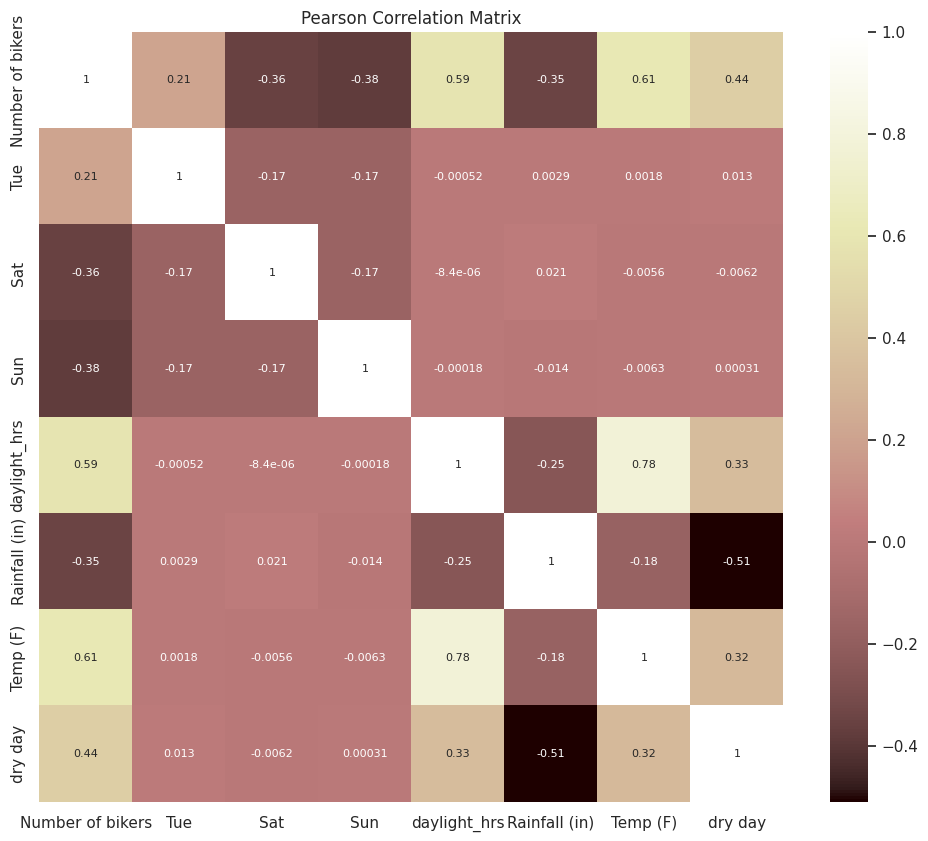

In [101]:
# Plot Pearson correlation matrix
fig_1 = plt.figure(figsize=(12, 10))
new_correlations = df.corr()
sns.heatmap(new_correlations, annot=True, cmap='pink', annot_kws={'size': 8})
plt.title('Pearson Correlation Matrix')
plt.show()

In [102]:
# Update features and store their length
features = df.iloc[:, 1:].columns.tolist()
len_of_features = len(features)
len_of_features

7

In [103]:
# Normalize the features
df.iloc[:, 1:] = (df - df.mean())/df.std()

In [104]:
# Split the data into features (X) and target variable (y)
X = df.iloc[:, 1:]
y = df.iloc[:, 0:1].values



In [105]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a column of ones to the training and testing sets
X_train = np.concatenate((np.ones([len(X_train), 1]), X_train), axis=1)
X_test = np.concatenate((np.ones([len(X_test), 1]), X_test), axis=1)

# Initialize theta with zeros
theta = np.zeros([1, len(X_train[0])])

# Display the size of the matrices for training and testing sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape, theta.shape


((2116, 8), (2116, 1), (530, 8), (530, 1), (1, 8))

In [106]:
# Define computecost function
def computecost(X, y, theta):
    H = X @ theta.T
    J = np.power((H - y), 2)
    sum = np.sum(J)/(2 * len(X))
    return sum

In [107]:
# Set iterations and alpha (learning rate)
alpha = 0.01
iterations = 500

In [108]:
# Define gradientdescent function
def gradientdescent(X, y, theta, iterations, alpha):
    cost = np.zeros(iterations)
    for i in range(iterations):
        H = X @ theta.T
        theta = theta - (alpha/len(X)) * np.sum(X * (H - y), axis=0)
        cost[i] = computecost(X, y, theta)
    return theta, cost

In [109]:
# Do Gradient Descent on the training set
final_theta, cost = gradientdescent(X_train, y_train, theta, iterations, alpha)

In [110]:
# Display the final theta for training set
print("Final Theta for Training Set:")
print(final_theta.round(2))


Final Theta for Training Set:
[[10909.71  3916.61    81.98  -778.73  -808.52   369.77  -395.16   656.81]]


In [111]:
# Compute and display Root Mean Squared Error on testing set
def rmse(target, final_theta):
    predictions = X_test @ final_theta.T
    return np.sqrt(((predictions[:, 0] - target[:, 0]) ** 2).mean())

rmse_val = rmse(y_test, final_theta)
print(f"Root Mean Squared Error on Testing Set: {rmse_val.round(2)}")

Root Mean Squared Error on Testing Set: 738.13


In [112]:
# Predict on the testing set
predictions_test = X_test @ final_theta.T

In [113]:
# Compute R2 score on testing set
r2_test = r2_score(y_test, predictions_test)
print(f"R-squared (R2) Score on Testing Set: {r2_test.round(2)}")

R-squared (R2) Score on Testing Set: 0.98


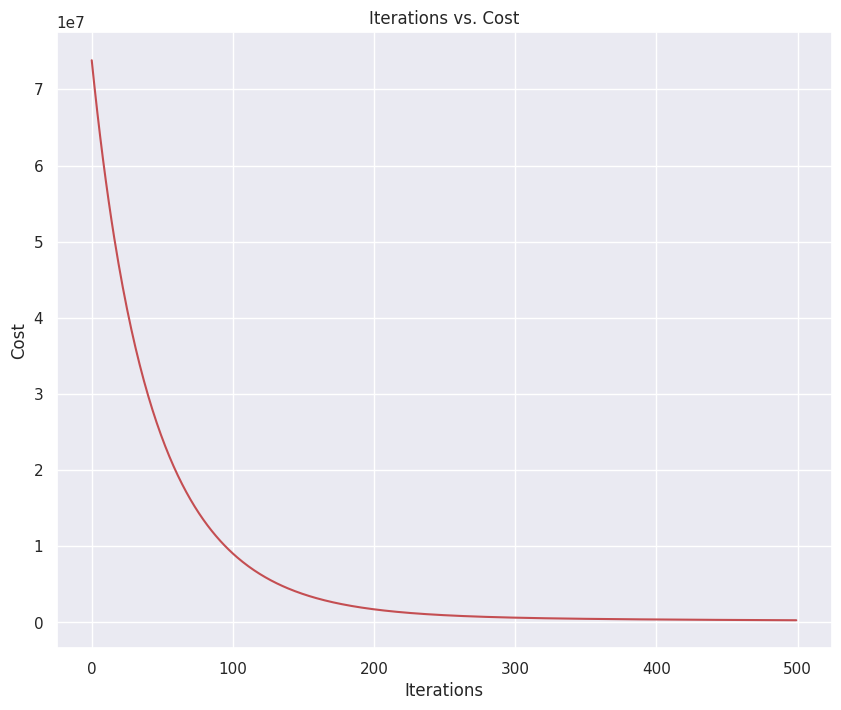

In [114]:
# Plot Iterations vs. Cost figure
fig_2, ax = plt.subplots(figsize=(10, 8))
ax.plot(np.arange(iterations), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Iterations vs. Cost')
plt.show()